In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.mv_baseline import MVBaseline

numpyro.set_platform('cpu')
numpyro.set_host_device_count(4)

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

In [3]:
import jax
import jax.numpy as jnp



In [4]:
jnp.diag(jnp.ones(5))

2023-03-07 22:02:04,446 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-03-07 22:02:04,447 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-07 22:02:04,447 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-07 22:02:04,448 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-03-07 22:02:04,449 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.


Array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### Load config

In [5]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [6]:
data = DataClass(config)
df, encoder_dict = data.build()

2023-03-07 22:02:04,922 - hb_mep.data_access.core - INFO - Reading data ....
2023-03-07 22:02:04,928 - hb_mep.data_access.core - INFO - Processing data ...
2023-03-07 22:02:04,967 - hb_mep.utils.utils - INFO - func:build took: 0.04 sec


#### Initialize model

In [7]:
model = MVBaseline(config)

#### Run MCMC inference

In [8]:
mcmc, posterior_samples = model.sample(df=df)

2023-03-07 22:02:05,427 - hb_mep.models.mv_baseline - INFO - Running inference with model mv_baseline...


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

2023-03-07 22:03:00,734 - hb_mep.utils.utils - INFO - func:sample took: 55.35 sec


#### Diagnostics

In [9]:
mcmc.print_summary()


                                             mean       std    median      5.0%     95.0%     n_eff     r_hat
                                 a[0,0]      6.72      0.21      6.77      6.49      6.99   1388.53      1.00
                                 a[0,1]      1.88      0.09      1.90      1.74      2.04   1483.21      1.00
                                 a[0,2]      2.02      0.06      2.03      1.94      2.12   4370.78      1.00
                                 a[0,3]      2.21      0.06      2.21      2.12      2.30   2810.89      1.00
                                 a[0,4]      3.00      0.05      3.00      2.92      3.08    687.93      1.00
                         a_global_scale      2.29      0.89      2.29      0.75      3.69   3052.51      1.00
                        a_level_mean[0]      2.88      1.36      2.84      0.72      5.21   2572.96      1.00
                        a_level_mean[1]      2.20      1.11      2.13      0.38      4.06   2786.25      1.00
         

#### Plot fitted curves

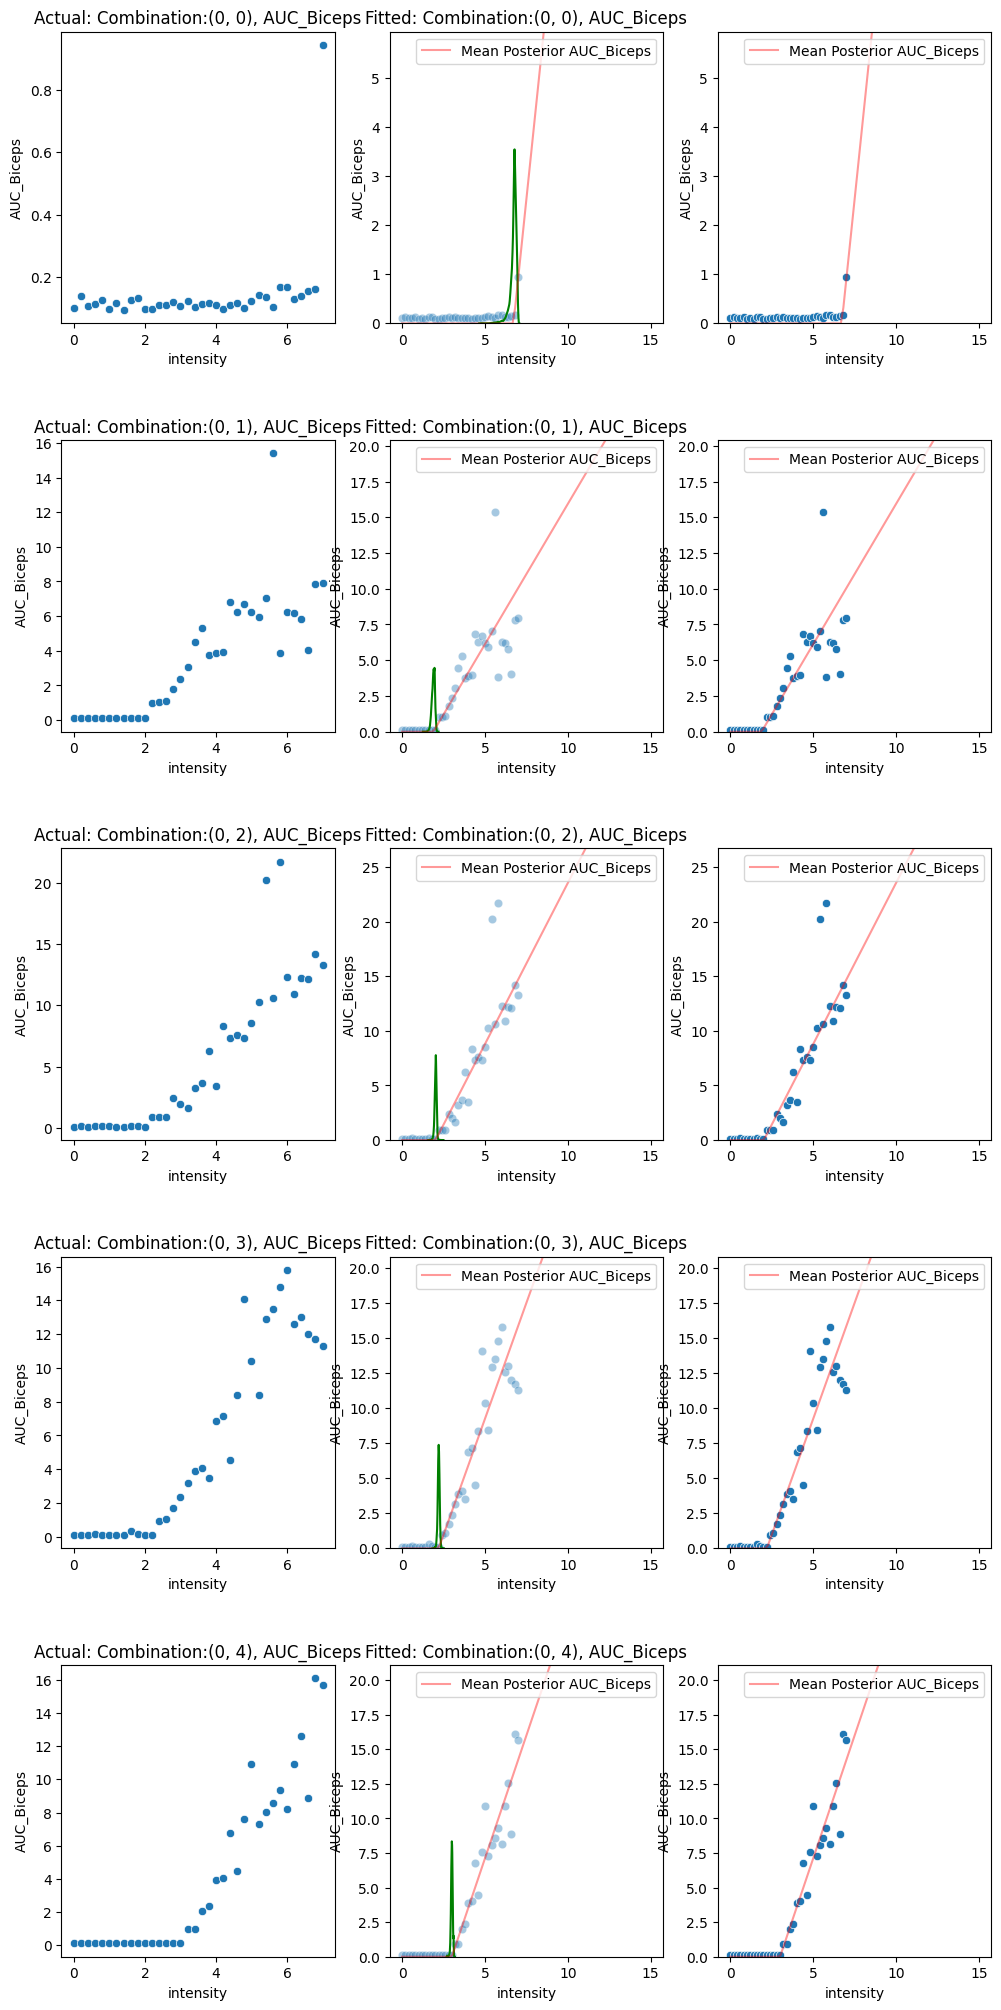

In [10]:
model.plot_fit(df=df, posterior_samples=posterior_samples);

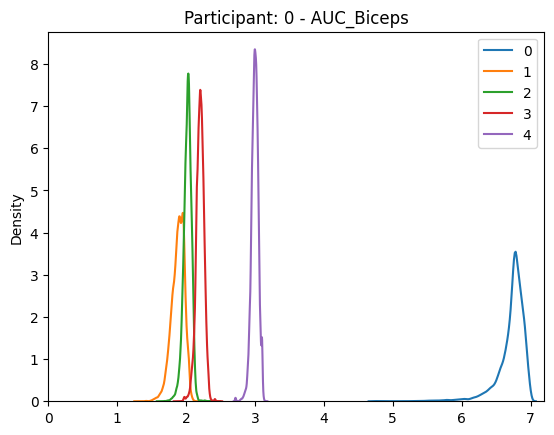

In [11]:
model.plot_kde(df=df, posterior_samples=posterior_samples);